In [8]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import numpy
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
from os import listdir
from os.path import isfile, join

In [9]:
# Download data set from plotly repo
pts = np.loadtxt(np.DataSource().open('https://raw.githubusercontent.com/plotly/datasets/master/mesh_dataset.txt'))
x, y, z = pts.T

fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='lightpink', opacity=0.50)])
fig.show()

In [10]:
base_url = "https://raw.githubusercontent.com/plotly/datasets/master/ply/"
mesh_names = ['sandal', 'scissors', 'shark', 'walkman']
dataframes = {
    name: pd.read_csv(base_url + name + '-ply.csv') 
    for name in mesh_names
}

In [24]:
name = 'sandal'

df = dataframes[name] # replace with your own data source
fig = go.Figure(go.Mesh3d(
    x=df.x, y=df.y, z=df.z, 
    i=df.i, j=df.j, k=df.k, 
    facecolor=df.facecolor))
fig.show()

In [12]:
df.head()


,x,y,z,facecolor,i,j,k
0,-2.42561,-1.47236,0.132523,"rgb(31,151,139)",0,1,2
1,-2.08997,-1.88351,0.097943,"rgb(31,151,139)",2,3,0
2,-2.23897,-1.89583,0.088308,"rgb(31,150,139)",0,3,4
3,-2.44966,-1.87043,0.076921,"rgb(31,150,139)",4,5,0
4,-2.66959,-1.81592,0.066715,"rgb(31,150,139)",0,5,6


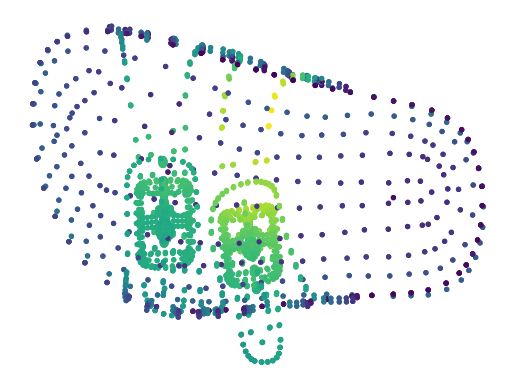

In [26]:
import matplotlib.pyplot as plt

M, m = df['z'].max(), df['z'].min()
c = np.zeros(len(df['x']))
c[:] = (df['z']-m)/(M-m)

plt.scatter(df['x'], df['y'], c=c, s=8)
plt.axis('off')
plt.savefig("Projection.png", bbox_inches='tight', pad_inches=0)
plt.show()

1.0

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Proj = mpimg.imread('Projection.png')

Img = np.zeros(Proj.shape)
N = 2
for i in range(N, len(Img)-N) :
    for j in range(N, len(Img)-N) :
        Img[i, j] = np.average(Proj[i-N:i+N, j-N:j+N])

In [49]:
np.average(Proj[i-10:i+10, j-10:j+10], axis=0)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

In [44]:
Img.shape, Proj.shape

((369, 496), (369, 496, 4))

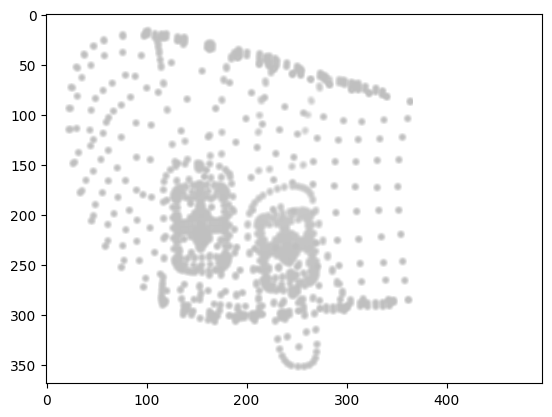

In [46]:
plt.imshow(Img)
plt.show()